In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

In [2]:
df_data1 =  pd.read_csv("all_data.csv") 
df_weights1 =  pd.read_csv("all_weights.csv") 

In [3]:
df_weights1

,Unnamed: 0,code,weight,Time
0,0,600519.ss,0.146670,2023q2
1,1,300750.sz,0.063575,2023q2
2,2,000858.sz,0.049056,2023q2
3,3,600036.ss,0.045353,2023q2
4,4,601318.ss,0.031689,2023q2
...,...,...,...,...
1545,45,601633.ss,0.004909,2023q3
1546,46,300999.sz,0.004646,2023q3
1547,47,601319.ss,0.004256,2023q3
1548,48,601939.ss,0.003848,2023q3


In [4]:
df_data1["Time"]=0
for i in range(len(df_data1)):
    m = pd.to_datetime(df_data1["Date"][i]).month
    if m == 1 or m == 2 or m == 3:
        df_data1["Time"][i] = str(pd.to_datetime(df_data1["Date"][i]).year) + 'q1'
    elif m == 4 or m == 5 or m == 6:
        df_data1["Time"][i] = str(pd.to_datetime(df_data1["Date"][i]).year) + 'q2'
    elif m == 7 or m == 8 or m == 9:
        df_data1["Time"][i] = str(pd.to_datetime(df_data1["Date"][i]).year) + 'q3'
    else:
        df_data1["Time"][i] = str(pd.to_datetime(df_data1["Date"][i]).year) + 'q4'

In [5]:
df_data1[df_data1["Time"] == '2016q4']

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %,000001.SZ,000002.SZ,...,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS,Time
1639,1639,2016-12-30,"9,970.30","9,915.66","9,974.21","9,914.51",NaN,0.55%,8.308615,15.004650,...,3.820396,6.037528,2.338265,7.054982,4.604567,NaN,12.713042,NaN,3.386057,2016q4
1640,1640,2016-12-29,"9,915.66","9,921.46","9,943.51","9,876.33",NaN,-0.06%,8.290354,15.216393,...,3.813373,6.011873,2.324670,7.124636,4.568651,NaN,12.652361,NaN,3.404261,2016q4
1641,1641,2016-12-28,"9,921.46","9,966.98","9,980.94","9,890.51",NaN,-0.46%,8.272095,15.479250,...,3.771236,6.071734,2.324670,7.253994,4.547100,NaN,12.652361,NaN,3.440671,2016q4
1642,1642,2016-12-27,"9,966.98","9,994.29","10,015.82","9,965.06",NaN,-0.27%,8.290354,15.639881,...,3.764213,6.020424,2.317873,7.363451,4.618934,NaN,12.717378,NaN,3.458875,2016q4
1643,1643,2016-12-26,"9,994.29","9,929.06","9,997.37","9,815.17",NaN,0.66%,8.326876,15.077664,...,3.764213,6.071734,2.338265,7.373401,4.683585,NaN,12.691372,NaN,3.486182,2016q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,2016-10-12,"9,680.40","9,708.03","9,708.53","9,659.43",NaN,-0.28%,8.336005,19.422077,...,3.637803,5.738218,2.304278,6.547501,4.288497,NaN,13.402225,NaN,3.422466,2016q4
1697,1697,2016-10-11,"9,708.03","9,692.13","9,723.91","9,676.07",NaN,0.16%,8.354265,19.151920,...,3.658872,5.721114,2.311076,6.627105,4.310047,NaN,13.432567,NaN,3.449773,2016q4
1698,1698,2016-10-10,"9,692.13","9,598.73","9,704.30","9,598.73",NaN,0.97%,8.326876,18.962082,...,3.658872,5.729665,2.311076,6.308686,4.317231,NaN,13.298199,NaN,3.440671,2016q4
1699,1699,2016-10-07,"9,598.73","9,598.73","9,598.73","9,598.73",NaN,0.00%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016q4


In [6]:
df_weights1['code']=df_weights1['code'].str.upper()
df_data1["Price"] = df_data1["Price"].str.replace(',', '').astype(float)

In [7]:
## 尝试直接将成分股股价乘权重再加和，结果异常
# sump = 0
# for i in range(50):
#     c = df_weights1[df_weights1["Time"] == '2016q3']["code"].iloc[i]
#     w = df_weights1[df_weights1["Time"] == '2016q3']["weight"].iloc[i]
#     p = df_data1[df_data1["Time"] == '2016q3'][c].head(1)
#     sump += p*w
# sump

In [8]:
big10 = pd.DataFrame(df_weights1.groupby('Time').head(10))
big10.head(12)

,Unnamed: 0,code,weight,Time
0,0,600519.SS,0.146670,2023q2
1,1,300750.SZ,0.063575,2023q2
2,2,000858.SZ,0.049056,2023q2
3,3,600036.SS,0.045353,2023q2
4,4,601318.SS,0.031689,2023q2
5,5,600900.SS,0.031002,2023q2
6,6,002594.SZ,0.029780,2023q2
7,7,300760.SZ,0.024245,2023q2
8,8,000568.SZ,0.024054,2023q2
9,9,601888.SS,0.022952,2023q2


In [9]:
df_data1=df_data1.iloc[::-1,1:]
# df_data1 = df_data1.apply(lambda col: col[::-1])

In [10]:
df_data1.set_index('Date', inplace=True)

In [11]:
# df_data1.reset_index()

In [12]:
df_data1 = df_data1.iloc[59:1886-346,:]

In [13]:
len(df_data1[df_data1['Time']=='2018q2'])

63

In [14]:
# value_counts_data1

In [15]:
df_data1

,Price,Open,High,Low,Vol.,Change %,000001.SZ,000002.SZ,000063.SZ,000166.SZ,...,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS,Time
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-01,9658.04,"9,614.12","9,661.90","9,484.72",NaN,0.46%,7.991925,17.120953,14.272146,5.784026,...,3.213134,6.509339,2.197508,7.074883,4.223403,NaN,13.254354,NaN,3.204627,2016q2
2016-04-05,9706.33,"9,658.04","9,733.41","9,568.61",NaN,0.50%,8.021914,17.120953,14.272146,5.875628,...,3.219772,6.585324,2.210397,7.214191,4.237274,NaN,13.377159,NaN,3.258942,2016q2
2016-04-06,9658.80,"9,706.33","9,706.33","9,612.82",NaN,-0.49%,8.036909,17.120953,14.272146,5.842913,...,3.206495,6.576880,2.203953,7.124636,4.188729,NaN,13.114611,NaN,3.249890,2016q2
2016-04-07,9542.45,"9,658.80","9,695.38","9,537.25",NaN,-1.20%,7.939445,17.120953,14.423776,5.744768,...,3.173301,6.484011,2.178176,6.995278,4.133249,NaN,13.051091,NaN,3.177469,2016q2
2016-04-08,9485.94,"9,542.45","9,542.45","9,448.66",NaN,-0.59%,7.924451,17.120953,13.750918,5.679338,...,3.160024,6.357370,2.165287,6.846019,4.140183,NaN,12.987572,NaN,3.123153,2016q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,13529.79,"13,788.97","13,815.15","13,523.96",NaN,-1.88%,14.361105,15.574676,24.712225,4.149650,...,5.376876,7.094491,2.772622,3.827023,4.037858,107.900475,65.074448,151.125198,5.312726,2022q1
2022-03-28,13420.67,"13,529.79","13,535.29","13,205.68",NaN,-0.81%,14.236477,15.896727,24.215252,4.178736,...,5.447508,7.285460,2.781396,3.827023,4.294652,109.383545,63.537720,149.070435,5.176751,2022q1
2022-03-29,13389.73,"13,420.67","13,535.63","13,363.27",NaN,-0.23%,14.073501,15.637297,23.445431,4.188432,...,5.500482,7.629204,2.798944,3.827023,4.312362,109.776413,62.392570,144.887238,5.176751,2022q1


In [16]:
df_pct = df_data1.copy()
df_pct = df_pct.reset_index()
df_pct.set_index(['Date','Time'], inplace=True)
df_pct = df_pct.iloc[:, 6:]
df_pct.dropna(how='all', inplace=True)

In [17]:
df_pct

,,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,000776.SZ,000858.SZ,...,601919.SS,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS
Date,Time,,,,,,,,,,,,,,,,,,,,,
2016-04-01,2016q2,7.991925,17.120953,14.272146,5.784026,15.983776,21.256580,12.611538,2.256564,13.394396,24.315781,...,3.284084,3.213134,6.509339,2.197508,7.074883,4.223403,NaN,13.254354,NaN,3.204627
2016-04-05,2016q2,8.021914,17.120953,14.272146,5.875628,16.088278,21.317364,12.611538,2.291823,13.668740,24.393965,...,3.444282,3.219772,6.585324,2.210397,7.214191,4.237274,NaN,13.377159,NaN,3.258942
2016-04-06,2016q2,8.036909,17.120953,14.272146,5.842913,16.067379,21.855726,12.611538,2.274193,13.628392,24.837019,...,3.364182,3.206495,6.576880,2.203953,7.124636,4.188729,NaN,13.114611,NaN,3.249890
2016-04-07,2016q2,7.939445,17.120953,14.423776,5.744768,15.727741,21.013451,12.611538,2.247749,13.289499,24.142033,...,3.316123,3.173301,6.484011,2.178176,6.995278,4.133249,NaN,13.051091,NaN,3.177469
2016-04-08,2016q2,7.924451,17.120953,13.750918,5.679338,15.685939,20.735586,12.611538,2.230120,13.023224,23.672920,...,3.262724,3.160024,6.357370,2.165287,6.846019,4.140183,NaN,12.987572,NaN,3.123153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,2022q1,14.361105,15.574676,24.712225,4.149650,51.685852,183.994919,27.146454,3.941821,16.150738,151.296814,...,10.947479,5.376876,7.094491,2.772622,3.827023,4.037858,107.900475,65.074448,151.125198,5.312726
2022-03-28,2022q1,14.236477,15.896727,24.215252,4.178736,51.418625,175.947189,27.249802,3.960459,16.302923,145.531387,...,10.919711,5.447508,7.285460,2.781396,3.827023,4.294652,109.383545,63.537720,149.070435,5.176751
2022-03-29,2022q1,14.073501,15.637297,23.445431,4.188432,50.358921,172.919632,26.939754,3.923184,16.046112,143.587112,...,11.176564,5.500482,7.629204,2.798944,3.827023,4.312362,109.776413,62.392570,144.887238,5.176751


In [18]:
df_pct = df_pct.reset_index()

In [19]:
df_pct = pd.DataFrame(df_pct.groupby('Time').head(1))

In [20]:
df_pct.head(3)

,Date,Time,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,...,601919.SS,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS
0,2016-04-01,2016q2,7.991925,17.120953,14.272146,5.784026,15.983776,21.256580,12.611538,2.256564,...,3.284084,3.213134,6.509339,2.197508,7.074883,4.223403,NaN,13.254354,NaN,3.204627
61,2016-07-01,2016q3,7.952531,17.120953,13.457136,5.489590,19.585712,25.919483,12.611538,2.045088,...,2.728726,3.342846,5.774822,2.188725,6.338538,3.932135,NaN,13.133488,NaN,3.756836
125,2016-10-10,2016q4,8.326876,18.962082,14.546630,5.769284,21.920059,28.342491,15.735955,2.142473,...,2.739406,3.658872,5.729665,2.311076,6.308686,4.317231,NaN,13.298199,NaN,3.440671


In [21]:
df_pct = df_pct.iloc[:, 2:]

In [22]:
df_pct = df_pct.apply(pd.to_numeric, errors='coerce')
df_pct = (df_pct - df_pct.shift(2))/df_pct.shift(2)

In [23]:
# df_pct

In [24]:
df_pct.iloc[2].nlargest(10)

002352.SZ    2.442742
600309.SS    0.407138
000333.SZ    0.371394
600436.SS    0.358146
601225.SS    0.338747
000568.SZ    0.333351
600519.SS    0.262812
601633.SS    0.256953
000651.SZ    0.247743
600690.SS    0.236067
Name: 125, dtype: float64

In [25]:
best10list = []
for i in range(2,len(df_pct)):
    best10list.append(df_pct.iloc[i].nlargest(10))
pd.DataFrame(best10list[0].reset_index())

,index,125
0,002352.SZ,2.442742
1,600309.SS,0.407138
2,000333.SZ,0.371394
3,600436.SS,0.358146
4,601225.SS,0.338747
5,000568.SZ,0.333351
6,600519.SS,0.262812
7,601633.SS,0.256953
8,000651.SZ,0.247743
9,600690.SS,0.236067


In [26]:
df_pct1 = df_data1.copy()
df_pct1 = df_pct1.reset_index()
df_pct1.set_index(['Date','Time'], inplace=True)
df_pct1 = df_pct1.iloc[:, 6:]
df_pct1.dropna(how='all', inplace=True)

In [27]:
# df_pct1 = df_pct1.iloc[:, :]
df_pct1 = df_pct1.apply(pd.to_numeric, errors='coerce')
df_pct1 = (df_pct1 - df_pct1.shift(1))/df_pct1.shift(1)

In [28]:
df_pct1 = df_pct1.reset_index()

In [29]:
df_pct1

,Date,Time,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,...,601919.SS,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS
0,2016-04-01,2016q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-05,2016q2,0.003752,0.000000,0.000000,0.015837,0.006538,0.002860,0.000000,0.015625,...,0.048780,0.002066,0.011673,0.005865,0.019690,0.003284,NaN,0.009265,NaN,0.016949
2,2016-04-06,2016q2,0.001869,0.000000,0.000000,-0.005568,-0.001299,0.025255,0.000000,-0.007692,...,-0.023256,-0.004124,-0.001282,-0.002915,-0.012414,-0.011457,NaN,-0.019627,NaN,-0.002778
3,2016-04-07,2016q2,-0.012127,0.000000,0.010624,-0.016797,-0.021138,-0.038538,0.000000,-0.011628,...,-0.014285,-0.010352,-0.014120,-0.011696,-0.018156,-0.013245,NaN,-0.004843,NaN,-0.022284
4,2016-04-08,2016q2,-0.001889,0.000000,-0.046649,-0.011390,-0.002658,-0.013223,0.000000,-0.007843,...,-0.016103,-0.004184,-0.019531,-0.005917,-0.021337,0.001678,NaN,-0.004867,NaN,-0.017094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2022-03-25,2022q1,-0.014474,-0.004005,-0.047333,-0.004651,-0.025877,-0.048424,-0.017150,-0.007042,...,-0.037240,0.001645,-0.032552,0.006369,-0.002604,0.020134,-0.061026,-0.021333,-0.033807,0.005515
1454,2022-03-28,2022q1,-0.008678,0.020678,-0.020110,0.007009,-0.005170,-0.043739,0.003807,0.004728,...,-0.002536,0.013136,0.026918,0.003165,0.000000,0.063596,0.013745,-0.023615,-0.013596,-0.025594
1455,2022-03-29,2022q1,-0.011448,-0.016320,-0.031791,0.002320,-0.020609,-0.017207,-0.011378,-0.009412,...,0.023522,0.009724,0.047182,0.006309,0.000000,0.004124,0.003592,-0.018023,-0.028062,0.000000
1456,2022-03-30,2022q1,0.036103,0.085812,0.011222,0.020833,0.043001,0.051743,0.025256,0.033254,...,-0.000621,-0.006421,0.001252,0.009404,0.005222,0.049281,0.015031,0.044168,0.007066,-0.005628


In [30]:
df_pct1['big10'] = 0
for i in range(len(df_pct1)):
    df_pct2 =df_pct1.iloc[i]
    df_pct1['big10'][i]=df_pct2[big10[big10['Time'] == df_pct1['Time'][i]]['code']].mean()
df_pct1

,Date,Time,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,...,601939.SS,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS,big10
0,2016-04-01,2016q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-05,2016q2,0.003752,0.000000,0.000000,0.015837,0.006538,0.002860,0.000000,0.015625,...,0.002066,0.011673,0.005865,0.019690,0.003284,NaN,0.009265,NaN,0.016949,0.002982
2,2016-04-06,2016q2,0.001869,0.000000,0.000000,-0.005568,-0.001299,0.025255,0.000000,-0.007692,...,-0.004124,-0.001282,-0.002915,-0.012414,-0.011457,NaN,-0.019627,NaN,-0.002778,-0.003195
3,2016-04-07,2016q2,-0.012127,0.000000,0.010624,-0.016797,-0.021138,-0.038538,0.000000,-0.011628,...,-0.010352,-0.014120,-0.011696,-0.018156,-0.013245,NaN,-0.004843,NaN,-0.022284,-0.011100
4,2016-04-08,2016q2,-0.001889,0.000000,-0.046649,-0.011390,-0.002658,-0.013223,0.000000,-0.007843,...,-0.004184,-0.019531,-0.005917,-0.021337,0.001678,NaN,-0.004867,NaN,-0.017094,-0.004279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2022-03-25,2022q1,-0.014474,-0.004005,-0.047333,-0.004651,-0.025877,-0.048424,-0.017150,-0.007042,...,0.001645,-0.032552,0.006369,-0.002604,0.020134,-0.061026,-0.021333,-0.033807,0.005515,-0.020178
1454,2022-03-28,2022q1,-0.008678,0.020678,-0.020110,0.007009,-0.005170,-0.043739,0.003807,0.004728,...,0.013136,0.026918,0.003165,0.000000,0.063596,0.013745,-0.023615,-0.013596,-0.025594,-0.009493
1455,2022-03-29,2022q1,-0.011448,-0.016320,-0.031791,0.002320,-0.020609,-0.017207,-0.011378,-0.009412,...,0.009724,0.047182,0.006309,0.000000,0.004124,0.003592,-0.018023,-0.028062,0.000000,-0.006831
1456,2022-03-30,2022q1,0.036103,0.085812,0.011222,0.020833,0.043001,0.051743,0.025256,0.033254,...,-0.006421,0.001252,0.009404,0.005222,0.049281,0.015031,0.044168,0.007066,-0.005628,0.035057


In [31]:
value_counts_data1 = df_pct1['Time'].value_counts(sort=False)
value_counts_data1 = pd.DataFrame(value_counts_data1).reset_index()

In [32]:
value_counts_data1

,Time,count
0,2016q2,61
1,2016q3,64
2,2016q4,60
3,2017q1,59
4,2017q2,60
5,2017q3,65
6,2017q4,60
7,2018q1,59
8,2018q2,60
9,2018q3,64


In [33]:
pre_quarter = value_counts_data1['count'][0]+value_counts_data1['count'][1]
pre_quarter 

125

In [34]:
value_counts_data1.head(3)

,Time,count
0,2016q2,61
1,2016q3,64
2,2016q4,60


In [35]:
df_pct.iloc[2].nlargest(10)

002352.SZ    2.442742
600309.SS    0.407138
000333.SZ    0.371394
600436.SS    0.358146
601225.SS    0.338747
000568.SZ    0.333351
600519.SS    0.262812
601633.SS    0.256953
000651.SZ    0.247743
600690.SS    0.236067
Name: 125, dtype: float64

In [36]:
best10list
df_pct1['best10'] = 0
for i in range(pre_quarter,len(df_pct1)):
    df_pct2 =df_pct1.iloc[i]
    index = value_counts_data1[value_counts_data1['Time'] == df_pct2['Time']].index[0]
    
    df_test = pd.DataFrame(df_pct.iloc[index].nlargest(10))
    df_test = df_test.reset_index()
    
    df_pct1['best10'][i]=df_pct2[df_test['index']].mean()


In [37]:
df_pct1.iloc[pre_quarter:,:]

,Date,Time,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,...,601985.SS,601988.SS,601989.SS,601998.SS,603259.SS,603288.SS,603501.SS,603993.SS,big10,best10
125,2016-10-10,2016q4,0.005513,-0.007642,0.020974,0.025559,-0.002221,0.024131,-0.004950,0.021097,...,0.009036,0.008902,0.022581,0.005017,NaN,0.010540,NaN,0.018868,0.009687,0.014809
126,2016-10-11,2016q4,0.003289,0.010011,0.001988,-0.001558,0.001855,-0.001571,0.000000,0.024793,...,-0.001492,0.000000,0.050473,-0.001664,NaN,0.010104,NaN,0.002645,0.001444,0.003201
127,2016-10-12,2016q4,-0.002186,0.014106,-0.007936,-0.004680,-0.007037,0.000315,0.004071,-0.004032,...,0.002990,-0.002941,-0.012012,-0.005000,NaN,-0.002259,NaN,-0.007916,-0.004225,0.004993
128,2016-10-13,2016q4,-0.006572,0.007895,-0.004000,0.003135,-0.019023,-0.013841,-0.005856,0.028340,...,0.000000,-0.002950,0.022796,0.000000,NaN,-0.001940,NaN,-0.002660,-0.000071,-0.007274
129,2016-10-14,2016q4,0.002205,0.001119,0.003347,0.003125,0.002662,0.000319,-0.005890,0.003937,...,0.002980,0.000000,-0.002972,-0.001675,NaN,-0.014582,NaN,-0.008000,0.004621,-0.002060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2022-03-25,2022q1,-0.014474,-0.004005,-0.047333,-0.004651,-0.025877,-0.048424,-0.017150,-0.007042,...,-0.032552,0.006369,-0.002604,0.020134,-0.061026,-0.021333,-0.033807,0.005515,-0.020178,-0.019515
1454,2022-03-28,2022q1,-0.008678,0.020678,-0.020110,0.007009,-0.005170,-0.043739,0.003807,0.004728,...,0.026918,0.003165,0.000000,0.063596,0.013745,-0.023615,-0.013596,-0.025594,-0.009493,0.025089
1455,2022-03-29,2022q1,-0.011448,-0.016320,-0.031791,0.002320,-0.020609,-0.017207,-0.011378,-0.009412,...,0.047182,0.006309,0.000000,0.004124,0.003592,-0.018023,-0.028062,0.000000,-0.006831,0.001859
1456,2022-03-30,2022q1,0.036103,0.085812,0.011222,0.020833,0.043001,0.051743,0.025256,0.033254,...,0.001252,0.009404,0.005222,0.049281,0.015031,0.044168,0.007066,-0.005628,0.035057,0.024381


In [38]:
df_pct1["bb20_return"] = 25e6* (1+df_pct1['big10']) + 25e6* (1+df_pct1['best10'])

In [39]:
df_data1 = df_data1.reset_index()

In [40]:
df_pct1["A50_price"] =0
for i in range(len(df_pct1)):
    d =df_pct1["Date"][i]
    df_pct1["A50_price"][i] = df_data1[df_data1["Date"] == d]["Price"]

In [41]:
df_pct1["A50_pct_change"] = (df_pct1["A50_price"]-df_pct1["A50_price"].shift(1))/df_pct1["A50_price"].shift(1)

In [42]:
df_pct1['A50_return'] = 5e7* (1+df_pct1["A50_pct_change"])
df_pct1['A50_return_pre'] = 1e8* (1+df_pct1["A50_pct_change"])

In [43]:
df_pct1["strategy_return"] = df_pct1['A50_return']+df_pct1["bb20_return"]

In [44]:
df_pct1[df_pct1["Time"] == "2019q4"]

,Date,Time,000001.SZ,000002.SZ,000063.SZ,000166.SZ,000333.SZ,000568.SZ,000651.SZ,000725.SZ,...,603501.SS,603993.SS,big10,best10,bb20_return,A50_price,A50_pct_change,A50_return,A50_return_pre,strategy_return
853,2019-10-08,2019q4,0.039128,0.017760,-0.007488,-0.004184,0.030333,0.035555,0.014834,0.000000,...,-0.015391,-0.008242,0.011850,0.008476,5.050816e+07,13715.01,0.011111,5.055554e+07,1.011111e+08,1.010637e+08
854,2019-10-09,2019q4,0.003086,0.016692,0.010689,0.004202,-0.002849,-0.008725,-0.019433,0.000000,...,0.035197,0.002770,0.000110,-0.010440,4.974175e+07,13719.58,0.000333,5.001666e+07,1.000333e+08,9.975841e+07
855,2019-10-10,2019q4,-0.000615,-0.006716,0.022395,0.006276,-0.006095,-0.009145,0.012101,0.005333,...,0.013000,-0.002762,0.005642,0.018037,5.059199e+07,13764.51,0.003275,5.016374e+07,1.003275e+08,1.007557e+08
856,2019-10-11,2019q4,0.035099,0.007137,0.000913,0.008316,0.014182,0.011421,0.014902,-0.002653,...,-0.022705,0.002770,0.016447,0.000899,5.043365e+07,13963.07,0.014426,5.072128e+07,1.014426e+08,1.011549e+08
857,2019-10-14,2019q4,0.024390,0.011563,0.001824,0.012371,0.010015,-0.000114,0.002220,0.010638,...,0.047172,0.008287,0.011277,0.007947,5.048059e+07,14096.20,0.009534,5.047672e+07,1.009534e+08,1.009573e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2019-12-25,2019q4,-0.006098,-0.002962,0.019022,-0.002020,0.002102,-0.014503,-0.009535,0.008511,...,0.075842,0.024390,-0.007002,0.002970,4.989920e+07,14018.95,-0.004698,4.976511e+07,9.953021e+07,9.966431e+07
910,2019-12-26,2019q4,0.010429,0.027402,0.004445,0.014170,0.006993,-0.001608,0.005901,0.018987,...,-0.051905,-0.009524,0.007850,-0.000470,5.018449e+07,14139.42,0.008593,5.042967e+07,1.008593e+08,1.006142e+08
911,2019-12-27,2019q4,0.009715,-0.003856,-0.007670,-0.013972,-0.006945,0.012139,-0.003859,-0.039337,...,-0.044846,0.040865,0.002627,0.000773,5.008502e+07,14173.74,0.002427,5.012136e+07,1.002427e+08,1.002064e+08
912,2019-12-30,2019q4,-0.003608,0.018387,0.021106,0.040486,0.018007,0.049198,0.016272,-0.017241,...,-0.024390,0.011547,0.010815,0.013267,5.060204e+07,14371.25,0.013935,5.069675e+07,1.013935e+08,1.012988e+08


In [45]:
df_pct3 = df_pct1.groupby("Time").head(1)

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

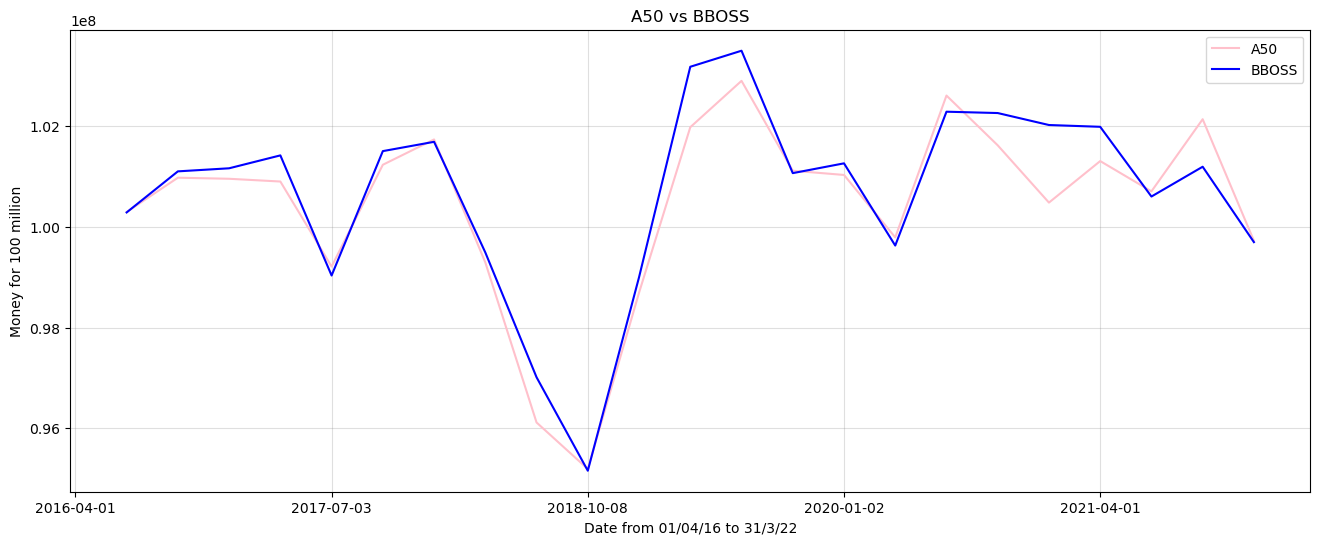

In [47]:
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

df_pct3 = df_pct3.set_index("Date")
df_pct3['A50_return_pre'].plot(figsize = [16, 6],color='pink',label='A50')
df_pct3['strategy_return'].plot(figsize = [16, 6],color='blue',label='BBOSS')

plt.xlabel("Date from 01/04/16 to 31/3/22")
plt.ylabel("Money for 100 million") 
plt.title("A50 vs BBOSS")
plt.legend()
plt.show()